In [9]:
import sys
sys.path.append('../StochBN/')
import torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from StochBN import utils
import numpy as np
from sklearn.metrics import log_loss

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
res = torch.load('eval-data/resnet18_ensembles_uncertainty_logits_500')
res128 = torch.load('eval-data/resnet18_ensembles_uncertainty_logits_500_bs128')
for m in ['uncorr_bn', 'BN', 'HBN', 'HBN-T']:
    try:
        res[m][128] = res128[m][128][128]
    except:
        pass

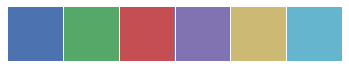

In [11]:
colors = sns.color_palette()
sns.palplot(colors)

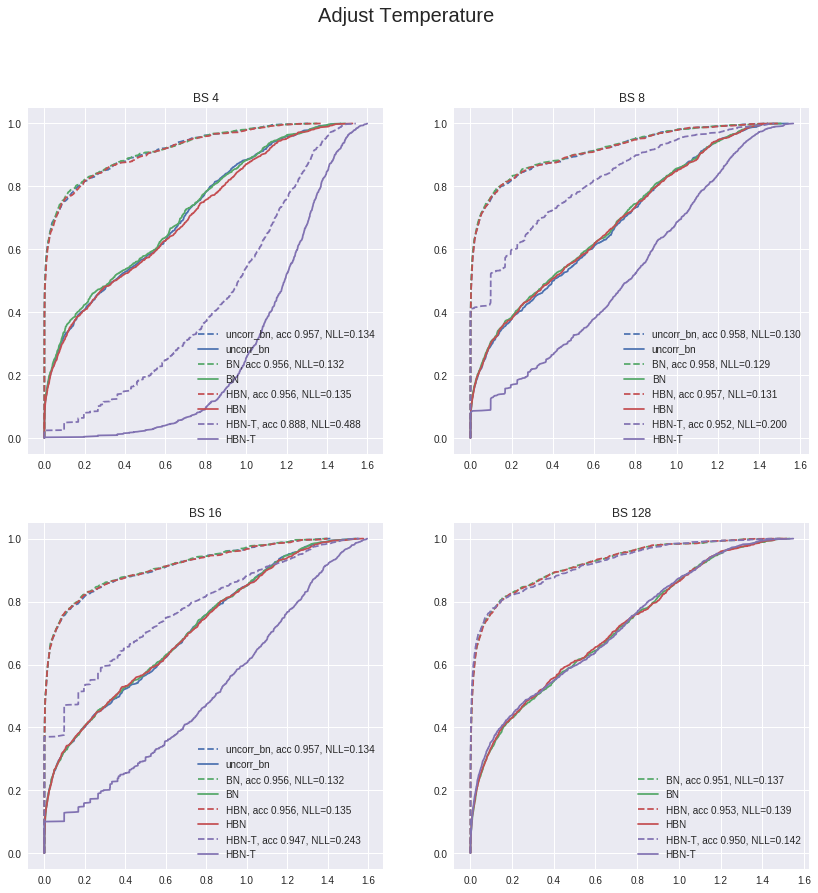

In [62]:
plt.figure(figsize=(14, 14))
plt.suptitle('Adjust Temperature', size=20)
n = 0
k = 1000
for _, bs in enumerate([4, 8 ,16, 128]):
    n += 1
    plt.subplot(2, 2, n)
    plt.title('BS {}'.format(bs))
    for c, model in zip(colors, ['uncorr_bn', 'BN', 'HBN', 'HBN-T']):
        if (bs == 128 and model == 'uncorr_bn'):
            continue
        logits_kn = res[model][bs]['known']['ensemble/logits']
        labels_kn = res[model][bs]['known']['ensemble/labels']
        acc = np.mean(res[model][bs]['known']['ensemble/proba'].argmax(1) == labels_kn)

        logits_ukn = res[model][bs]['unknown']['ensemble/logits']
        labels_ukn = res[model][bs]['unknown']['ensemble/labels']

        temp = utils.adjust_temp(logits_kn[:, :k], labels_kn[:k], proba=False)
        nll = log_loss(labels_kn, utils.softmax(logits_kn, temp=temp))
        plt.plot(*utils.entropy_plot_xy(utils.softmax(logits_kn[:, :k], temp=temp)), c=c, ls='--', 
                 label='{}, acc {:.3f}, NLL={:.3f}'.format(model, acc, nll))
        plt.plot(*utils.entropy_plot_xy(utils.softmax(logits_ukn[:, :k], temp=temp)), c=c, label=model)

        plt.legend()
plt.savefig('plots/resnet18/cifar5/adj-t/entropy', dpi=300)

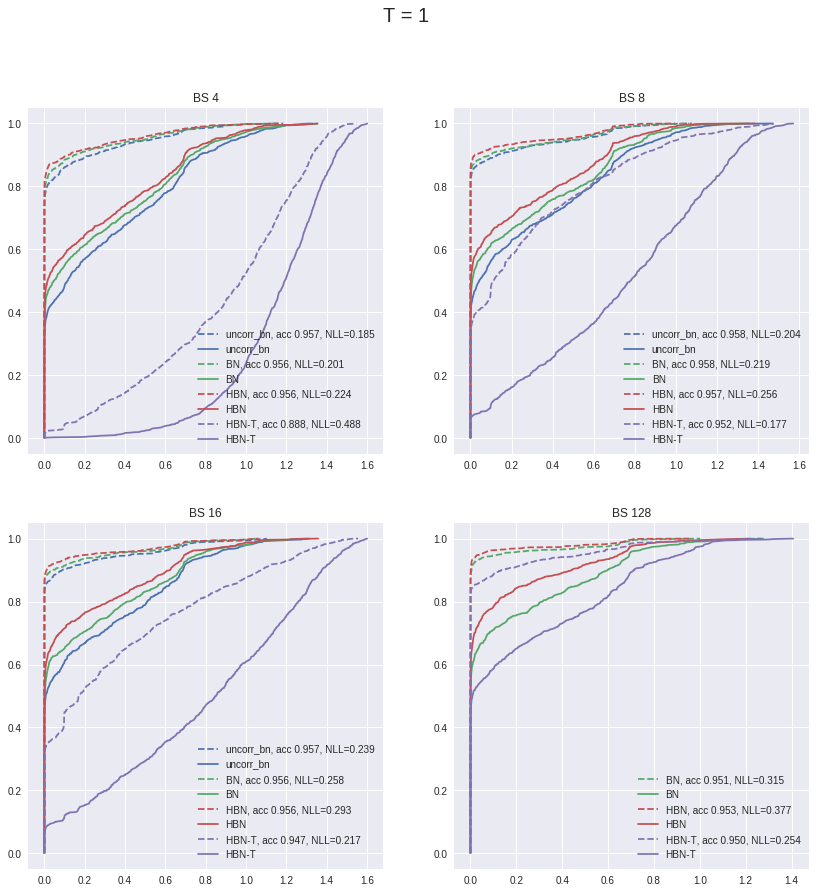

In [63]:
plt.figure(figsize=(14, 14))
plt.suptitle('T = 1', size=20)
n = 0
k = 1000
for _, bs in enumerate([4, 8 ,16, 128]):
    n += 1
    plt.subplot(2, 2, n)
    plt.title('BS {}'.format(bs))
    for c, model in zip(colors, ['uncorr_bn', 'BN', 'HBN', 'HBN-T']):
        if (bs == 128 and model == 'uncorr_bn'):
            continue
        logits_kn = res[model][bs]['known']['ensemble/logits']
        labels_kn = res[model][bs]['known']['ensemble/labels']
        acc = np.mean(res[model][bs]['known']['ensemble/proba'].argmax(1) == labels_kn)

        logits_ukn = res[model][bs]['unknown']['ensemble/logits']
        labels_ukn = res[model][bs]['unknown']['ensemble/labels']

        temp = 1.
        nll = log_loss(labels_kn, utils.softmax(logits_kn, temp=temp))
        plt.plot(*utils.entropy_plot_xy(utils.softmax(logits_kn[:, :k], temp=temp)), c=c, ls='--', 
                 label='{}, acc {:.3f}, NLL={:.3f}'.format(model, acc, nll))
        plt.plot(*utils.entropy_plot_xy(utils.softmax(logits_ukn[:, :k], temp=temp)), c=c, label=model)

        plt.legend()
plt.savefig('plots/resnet18/cifar5/entropy', dpi=300)

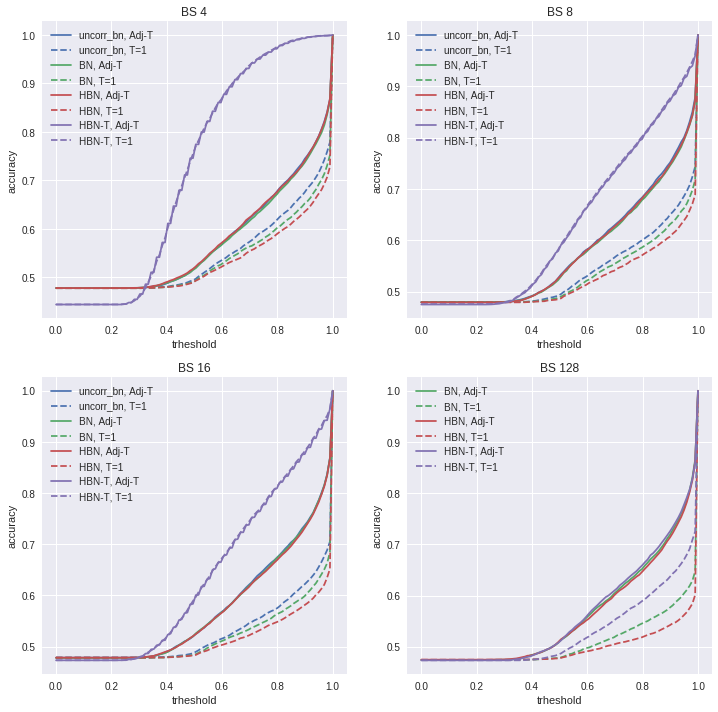

In [71]:
plt.figure(figsize=(12, 12))
n = 0
for _, bs in enumerate([4, 8, 16, 128]):
    n += 1
    plt.subplot(2, 2, n)
    plt.title('BS ' + str(bs))


    for c, model in zip(colors, ['uncorr_bn', 'BN', 'HBN', 'HBN-T']):
        if (bs == 128 and model == 'uncorr_bn'):
            continue
        
        logits_kn = res[model][bs]['known']['ensemble/logits']
        labels_kn = res[model][bs]['known']['ensemble/labels']
        acc = np.mean(res[model][bs]['known']['ensemble/proba'].argmax(1) == labels_kn)

        logits_ukn = res[model][bs]['unknown']['ensemble/logits']
        labels_ukn = res[model][bs]['unknown']['ensemble/labels']

        temp = utils.adjust_temp(logits_kn[:, :k], labels_kn[:k], proba=False)


        p = np.concatenate((utils.softmax(logits_kn, temp=temp)[k:],
                            utils.softmax(logits_ukn, temp=temp)[k:]))
        y = np.concatenate((labels_kn[k:], labels_ukn[k:] * 0 - 1))
        x, acc, frac = utils.acc_vs_conf(p, y, fract=True)
        plt.plot(x, acc, c=c, label='{}, Adj-T'.format(model))

        p = np.concatenate((utils.softmax(logits_kn, temp=1)[k:],
                            utils.softmax(logits_ukn, temp=1)[k:]))
        y = np.concatenate((labels_kn[k:], labels_ukn[k:] * 0 - 1))
        x, acc, frac = utils.acc_vs_conf(p, y, fract=True)
        plt.plot(x, acc, c=c, label='{}, T=1'.format(model), ls='--')


    plt.legend()
    plt.xlabel('trheshold')
    plt.ylabel('accuracy')

plt.savefig('plots/resnet18/cifar5/threshold-vs-acc', dpi=300)

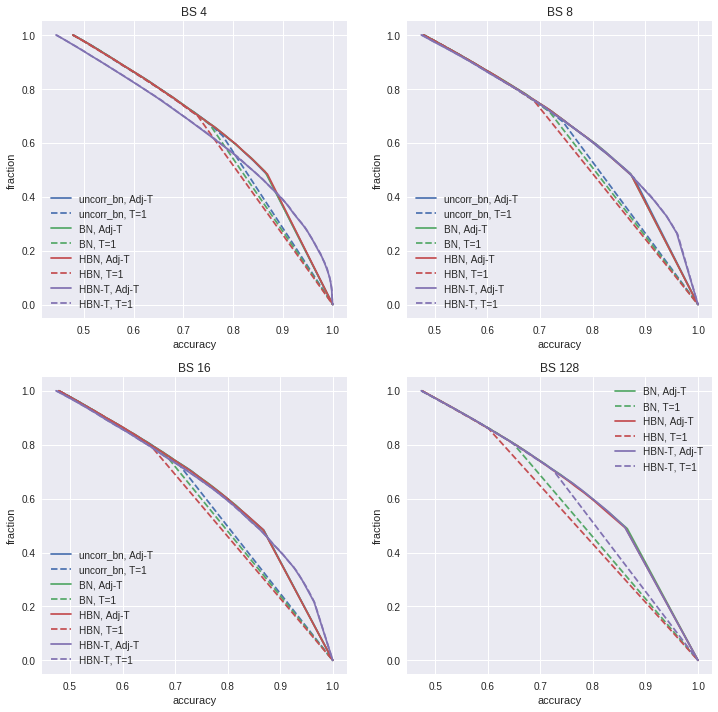

In [69]:
plt.figure(figsize=(12, 12))
n = 0
for _, bs in enumerate([4, 8, 16, 128]):
    n += 1
    plt.subplot(2, 2, n)
    plt.title('BS ' + str(bs))
    
    for c, model in zip(colors, ['uncorr_bn', 'BN', 'HBN', 'HBN-T']):
        if (bs == 128 and model == 'uncorr_bn'):
            continue

        
        logits_kn = res[model][bs]['known']['ensemble/logits']
        labels_kn = res[model][bs]['known']['ensemble/labels']
        acc = np.mean(res[model][bs]['known']['ensemble/proba'].argmax(1) == labels_kn)

        logits_ukn = res[model][bs]['unknown']['ensemble/logits']
        labels_ukn = res[model][bs]['unknown']['ensemble/labels']

        temp = utils.adjust_temp(logits_kn[:, :k], labels_kn[:k], proba=False)


        p = np.concatenate((utils.softmax(logits_kn, temp=temp)[k:],
                            utils.softmax(logits_ukn, temp=temp)[k:]))
        y = np.concatenate((labels_kn[k:], labels_ukn[k:] * 0 - 1))
        x, acc, frac = utils.acc_vs_conf(p, y, fract=True)
        plt.plot(acc, frac, c=c, label='{}, Adj-T'.format(model))        

        p = np.concatenate((utils.softmax(logits_kn, temp=1)[k:],
                            utils.softmax(logits_ukn, temp=1)[k:]))
        y = np.concatenate((labels_kn[k:], labels_ukn[k:] * 0 - 1))
        x, acc, frac = utils.acc_vs_conf(p, y, fract=True)
        plt.plot(acc, frac, c=c, label='{}, T=1'.format(model), ls='--')        

    plt.legend()
    plt.xlabel('accuracy')
    plt.ylabel('fraction')
plt.savefig('plots/resnet18/cifar5/acc-vs-fraction', dpi=300)